In [1]:
import db
import ROOT
import numpy as np
from matplotlib import pyplot as plt
import os
print(os.getcwd())

Welcome to JupyROOT 6.14/04
/workdir/jupyter


In [2]:
# save all informations of the PASTTREC database (incl. threshold, baseline scans) into an root file
db.dump_db_to_root("/workdir/dump.root")


dumping data of board: 80011
dumping data of board: 80012
dumping data of board: 80013
dumping data of board: 80014
dumping data of board: 80061
dumping data of board: 80062
dumping data of board: 80063
dumping data of board: 80064
dumping data of board: 80091
dumping data of board: 80092
dumping data of board: 80093
dumping data of board: 80094
dumping data of board: 80121
dumping data of board: 80122
dumping data of board: 80123
dumping data of board: 80124
dumping data of board: 80021
dumping data of board: 80022
dumping data of board: 80023
dumping data of board: 80024
dumping data of board: 80081
dumping data of board: 80082
dumping data of board: 80083
dumping data of board: 80084
dumping data of board: 80071
dumping data of board: 80072
dumping data of board: 80073
dumping data of board: 80074
dumping data of board: 80051
dumping data of board: 80052
dumping data of board: 80053
dumping data of board: 80054
dumping data of board: 80111
dumping data of board: 80112
dumping data o

In [3]:
import pasttrec_ctrl as ptc
import tdc_daq as td
import baseline_calib

boards_on_list = ['0014', '0021', '0018', '0022', '0003', '0008', '0027', '0026', '0025', '0004', '0110', '0111']
#boards_on_list = db.board_list()
#boards_on_list = []

# set yout PASTTREC settings:
ptime = 15
pt_gain = 4
# for my_board in db.board_list():
#         db.unset_standby_board(my_board)
for name in db.board_list_installed():
    #deactivate all other boards
    for my_board in db.board_list():
         db.set_standby_board(my_board)
    for my_board in boards_on_list:
        db.unset_standby_board(my_board)
    #activate current board to measure:
    db.unset_standby_board(name)
    td.enable_tdc_channels_of_active_boards()
        # init all boards with default/standby settings:
    ptc.init_active_boards()
        # init current board with custom settings:    
    ptc.init_board_by_name(name, ptime, pt_gain)  
    # if needed, set baseline to maximum (for negative signals, minimum for positive signals) to get full "gaus curve" of noise scan 
    # baselines_set =  [15] * 16 
    # baseline_calib.set_baselines_individual(name,baselines_set)
    #do a dummy threshold scan, of noise, which is stored as "dummy_calibration" inside database of the board    baseline_calib.char_noise_by_thresh_scan(name,dummy_calib=True)
    print("scanning noise of board ", name)
    print("active boards", db.nostandby_board_list())
    baseline_calib.char_noise_by_thresh_scan(name,dummy_calib=True)
       #deactivate current board :
    db.set_standby_board(name)

scanning noise of board  80011
active boards ['80011']
scanning noise of board  80012
active boards ['80012']
scanning noise of board  80013
active boards ['80013']
scanning noise of board  80014
active boards ['80014']
scanning noise of board  80061
active boards ['80061']
scanning noise of board  80062
active boards ['80062']
scanning noise of board  80063
active boards ['80063']
scanning noise of board  80064
active boards ['80064']
scanning noise of board  80091
active boards ['80091']
scanning noise of board  80092
active boards ['80092']
scanning noise of board  80093
active boards ['80093']
scanning noise of board  80094
active boards ['80094']
scanning noise of board  80121
active boards ['80121']
scanning noise of board  80122
active boards ['80122']
scanning noise of board  80123
active boards ['80123']
scanning noise of board  80124
active boards ['80124']
scanning noise of board  80021
active boards ['80021']
scanning noise of board  80022
active boards ['80022']
scanning n

>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reache

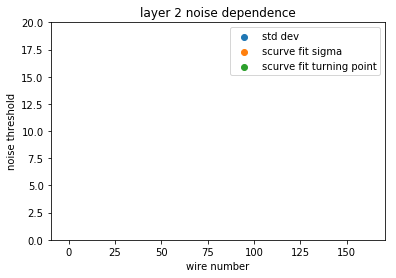

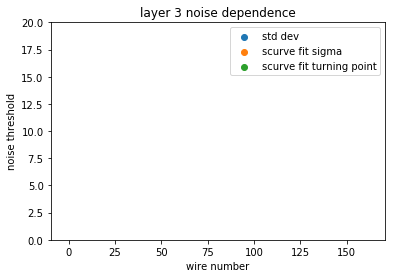

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


In [5]:
gif_out_list = []
f = ROOT.TFile("/workdir/dump.root")
#f = ROOT.TFile("/workdir/dump_noisescann_all_boards_on.root")
# f = ROOT.TFile("/workdir/dump_noisescann_all_other_boards_off.root")
# f = ROOT.TFile("/workdir/dump_noisescann_all_other_boards_off_baseline.root")
# f = ROOT.TFile("/workdir/dump_noisescann_half_boards_on_gain2.root")
#f = ROOT.TFile("/workdir/dump_noisescann_half_boards_on_gain1.root")
    
#tree = f.Get("scope_data_tree")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",640,480)
c.Divide(10,5)
#tree.Draw("tot_a:t1_a >> potato(500,0,500e-9,500,0,500e-9)","","colz")
#potato = f.Get("potato")
#potato.SetTitle("potato")
#potato.GetXaxis().SetTitle("t1 (s)")
#potato.GetYaxis().SetTitle("tot (s)")
#potato.Draw("colz")
ROOT.gStyle.SetOptFit(1)
n_wires = 162
mg = ROOT.TMultiGraph()
mg2 = ROOT.TMultiGraph()
gr = [1, 2]
gr2 = [1, 2]


      
dummy_tsbl_tree = f.Get("dummy_tsbl_tree")
index_l = -1
for l in range(2,4):
    index_l += 1
    stdev_list = []
    sigma_list = []
    mean_list = []    
    sigma_list_err = []
    mean_list_err = []  
        
    gr[index_l] = ROOT.TGraphErrors(); gr[index_l].SetLineColor(l);
    gr2[index_l] = ROOT.TGraphErrors(); gr2[index_l].SetLineColor(l);
#     scurve = ROOT.TF1("scurve","[0]*(1+erf((-1*x+[2])/(sqrt(2)*[1])))",0,80)
    scurve = ROOT.TF1("scurve","[3]+[0]*(1+erf((-1*x+[1])/(sqrt(2)*[2])))",0,130)
        
    # clear older fit plots
    fit_dir = "/workdir/data/noise/fit_lay"+str(l)
    # clear older fit plots
    os.system("rm -rf {:s}/*".format(fit_dir))
    if not os.path.exists(fit_dir):
        os.mkdir(fit_dir)
    gif_out_list += [fit_dir]

#dummy_tsbl_tree.Draw("dummy_calib_tsbl_scan_raw:wires>>noise_scan(140,0,140,32,0,32)","chamber == 0 && layer == 3 && name == 0017","colz")
    for i in range(0,n_wires):
       #dummy_tsbl_tree.Draw("dummy_calib_tsbl_scan_raw >> raw_scan(120,-20,100)","chamber == 0 && layer == 3 && name == 0015 && board_chan == " + str(i) ,"colz")
       dummy_tsbl_tree.Draw("dummy_calib_tsbl_scan_raw >> raw_scan(150,-10,140)","chamber == 0 && layer_a == " + str(l) + " && wires == " + str(i) )  
       raw_scan = f.Get("raw_scan")
       if ( raw_scan.GetEntries() > 100 ):
           raw_scan.DrawCopy()
           c.cd(i+1)
           #raw_scan.Fit("gaus","Q")
           stdev = raw_scan.GetStdDev(1)
           maxX = raw_scan.GetBinCenter(raw_scan.GetMaximumBin()) 
           maxX += -2.0       
           scurve.SetParameters(raw_scan.GetMaximum(),stdev,maxX+stdev)
           raw_scan.Fit("scurve","Q","",maxX, 100)
#            scurve.Draw()
           raw_scan.Draw()
           c.Draw()
           c.Update()
           fit_picture_file = fit_dir+"/noiseFit_lay" + str(l) +"_wire{:03d}".format(i) +".png"
           c.SaveAs(fit_picture_file)        
          # function = raw_scan.GetFunction("gaus")
           function = raw_scan.GetFunction("scurve")
               #print(i,raw_scan.GetStdDev(1),function.GetParameter(2))
               #print(i,function.GetParameter(1),function.GetParameter(2))
           if ( function.GetParameter(1) < 30 and function.GetParameter(1) > 0):
               sigma_list += [ function.GetParameter(1) ]
               sigma_list_err += [ function.GetParError(1) ]                
           else:
               sigma_list += [ -2 ] 
               sigma_list_err += [ -2 ]                 
           if ( function.GetParameter(2) < 30 and function.GetParameter(2) > 0):    
               mean_list += [ function.GetParameter(2) ]
               mean_list_err += [ function.GetParError(2) ]
           else:     
               mean_list += [ -2 ] 
               mean_list_err += [ -2 ]                 
           stdev_list += [ raw_scan.GetStdDev(1) ]
       else:
           stdev_list += [ -1 ]
           sigma_list += [ -1 ]       
           mean_list += [ -1 ]     
           sigma_list_err += [ -1 ]       
           mean_list_err += [ -1 ]
       gr[index_l].SetPoint(i, i, np.double(sigma_list[i]))
       gr[index_l].SetPointError(i, 0, np.double(sigma_list_err[i]) )
       gr2[index_l].SetPoint(i, i, np.double(mean_list[i]))
       gr2[index_l].SetPointError(i, 0, np.double(mean_list_err[i]) )


    plt.scatter(list(range(0,n_wires)), stdev_list, label="std dev")
    plt.xlabel("wire number")
    plt.ylabel("noise threshold")
    plt.title("layer " + str(l) + " noise dependence")
    plt.scatter(list(range(0,n_wires)), sigma_list, label="scurve fit sigma")
    plt.scatter(list(range(0,n_wires)), mean_list, label="scurve fit turning point")
    plt.ylim(0,20)
    plt.legend()
    plt.show()

    
    mg.Add(gr[index_l]); gr[index_l].SetTitle("layer " + str(l) ); gr[index_l].SetLineWidth(2);
    mg2.Add(gr2[index_l]); gr2[index_l].SetTitle("layer " + str(l) ); gr2[index_l].SetLineWidth(2);   


In [ ]:


#c1 = ROOT.TCanvas("myCanvasName","The Canvas Title",640,480)
c1 = ROOT.TCanvas("c1","The Canvas Title",640,480); c1.cd();
mg2.Draw("a*")
mg2.GetXaxis().SetTitle("wire number");
mg2.GetYaxis().SetTitle("noise threshold half max (DAC)");
c1.Draw()
c.cd();
mg.Draw("a*")
mg.GetXaxis().SetTitle("wire number");
mg.GetYaxis().SetTitle("noise threshold sigma (DAC)");
c.Draw()
#c2 = ROOT.TCanvas("myCanvasName","The Canvas Title",640,480); c2.cd();
#mg2.Draw("a*")


In [ ]:
from IPython.display import Image
## display all single channel threshold scan fits into an animated gif

# gif_out_list = ["/workdir/data/noise/fit/"]
for subfolder in sorted(list(set(gif_out_list))):
        print("animating graphics in {:s}".format(subfolder))
        print(subfolder)
        os.system("cd  {:s}; convert -alpha off -delay 100 -loop 0 *png output.gif ".format(subfolder))
        with open('{:s}/output.gif'.format(subfolder),'rb') as f:
            display(Image(data=f.read(), format='png'))
